# Actividad N° 05: iFood

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Trabajamos sobre el conjunto de datos *marketing-campaign.csv* de iFood. El objetivo de la actividad es validar los modelos de clasificación y regresión utilizados para predecir distintas variables.

# Consigna

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`.
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

## Consideraciones

Repliquen este notebook para la resolución del ejercicio. Consideren las etapas:

1) Cargamos los datos

2) Preparación de la data

3) Clasificación

4) Regresión

5) Guardar un modelo.

**Podemos decidir:**
- Cómo preparar y acondicionar el dataset.
- Pueden agregar y eliminar columnas del dataset.
- Decidir parámetros para ajustar en los modelos de clasificación y regresión.

# Código

#### CARGA DE DATOS

In [226]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt

from funpymodeling.exploratory import status
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import RocCurveDisplay

In [227]:
data = pd.read_csv("marketing_campaign.csv", sep=';', index_col=0)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [228]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Education,0,0.000000,0,0.000000,5,object
2,Marital_Status,0,0.000000,0,0.000000,8,object
3,Income,24,0.010714,0,0.000000,1974,float64
4,Kidhome,0,0.000000,1293,0.577232,3,int64
5,Teenhome,0,0.000000,1158,0.516964,3,int64
6,Dt_Customer,0,0.000000,0,0.000000,663,object
7,Recency,0,0.000000,28,0.012500,100,int64
8,MntWines,0,0.000000,13,0.005804,776,int64
9,MntFruits,0,0.000000,400,0.178571,158,int64


#### DESCARTE DE REGISTROS CON VARIABLE OBJETIVO NULA

In [229]:
discarded_data = data[data["Income"].isna()]
data = data[data["Income"].notna()]

#### CHEQUEO DE ALGUNAS VARIABLES

In [230]:
print("Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías")
data[data["MntGoldProds"] > (data["MntFishProducts"] + data["MntMeatProducts"] + data["MntFruits"] + data["MntSweetProducts"] + data["MntWines"])][["MntGoldProds","MntFishProducts","MntMeatProducts","MntFruits","MntSweetProducts","MntWines"]]

Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías


,MntGoldProds,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines
ID,,,,,,
4246,262,4,26,11,3,67
6237,291,5,33,4,2,81
10311,321,2,12,4,4,16


In [231]:
print("Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad")
data["Response"].sum() / data.shape[0]

Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad


0.15027075812274368

#### ELIMINAMOS COLUMNAS FECHA Y CON VALORES ÚNICOS

In [232]:
columnas_a_eliminar = ['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
data = data.drop(columns=columnas_a_eliminar)

In [233]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,0,0.000000,5,object
1,Marital_Status,0,0.0,0,0.000000,8,object
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


#### TRANSFORMAMOS COLUMNAS OBJECT A NUMÉRICAS, YA QUE SON POCOS VALORES

In [234]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [235]:
class_map = {'Single':0, 'Married':1, 'Together':1, 'Divorced':2, 'Widow':3, 'Alone':0, 'Absurd':0, 'YOLO':0}
data['Marital_Status'] = data['Marital_Status'].map(class_map)

In [236]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [237]:
# Si tuvieramos el orden de la etapa más básica a la más especializada, podríamos ordenarlas
class_map = {'Graduation':0, 'PhD':1, 'Master':2, 'Basic':3, '2n Cycle':4}
data['Education'] = data['Education'].map(class_map)

In [238]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,1116,0.503610,5,int64
1,Marital_Status,0,0.0,478,0.215704,4,int64
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


## Clasificación
Variable target: Response

### Random Forest Classifier

In [239]:
x_data_classification = data.drop('Response', axis=1)
y_data_classification = data['Response']

x_data_classification = x_data_classification.values
y_data_classification = y_data_classification.values

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(x_data_classification, y_data_classification, test_size=0.3, random_state=42)

In [240]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)

rfc.fit(x_train_classification, y_train_classification)
y_train_classification_pred = rfc.predict(x_train_classification)

In [241]:
pred_probs = rfc.predict_proba(x_train_classification)
pred_probs

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.92, 0.08],
       [0.9 , 0.1 ]])

In [242]:
pred_probs

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.92, 0.08],
       [0.9 , 0.1 ]])

In [243]:
y_probs_tr = pred_probs[: ,1]

In [244]:
y_probs_tr 

array([0.  , 0.6 , 0.01, ..., 0.01, 0.08, 0.1 ])

In [245]:
with open('rfc.pickle', 'wb') as handle:
    pickle.dump(rfc, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Matriz de Confusión

In [246]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

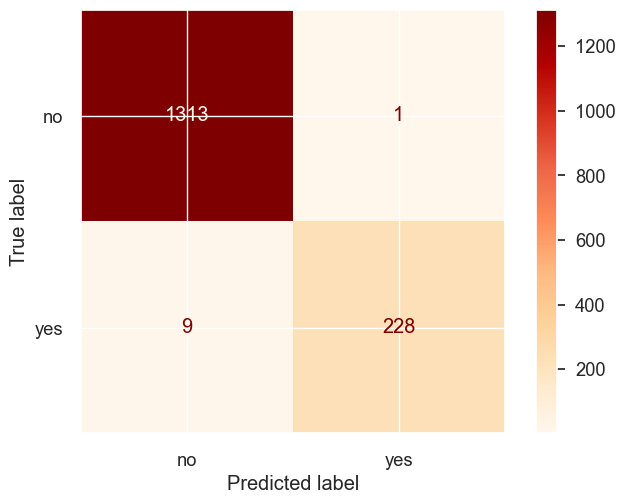

In [247]:
sns.set_theme(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','yes'],
    cmap='OrRd',
    )

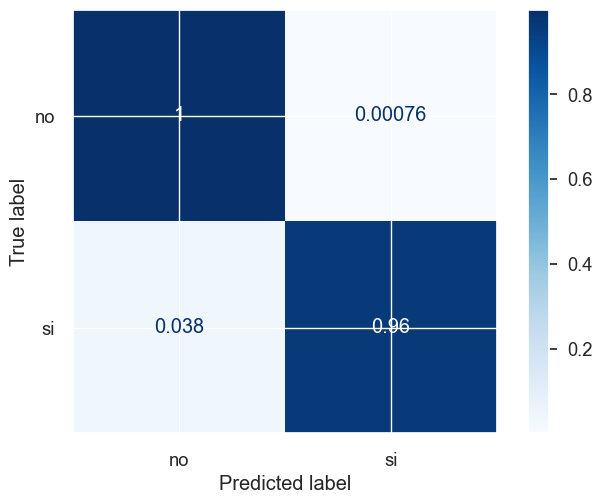

In [248]:
ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

In [249]:
y_pred1=rfc.predict(x_train_classification)

conf_mat1=pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

print(conf_mat1)

Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025


In [250]:
pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize= True)

Pred,0,1
Actual,,
0,0.846551,0.000645
1,0.005803,0.147002


### Variar el punto de corte

In [251]:
y_probs_tr.mean()


0.15387792054281418

In [252]:
y_preds2=np.where(y_probs_tr > 0.15, 1, 0)

In [253]:
conf_mat2=pd.crosstab(index=y_train_classification, 
                      columns=y_preds2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

print(conf_mat2)

Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Comparo el antes y el después

In [254]:
print("### Matriz Predicciones corte 0.5 (default)")
print(conf_mat1)

print("-"*40)
print("### Matriz Predicciones corte 0.15 ")
print(conf_mat2)

### Matriz Predicciones corte 0.5 (default)
Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025
----------------------------------------
### Matriz Predicciones corte 0.15 
Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Con el corte en 0.5 tengo más presición con los negativos y menos con los positivos.</br>
Con el corte en 0.15 tengo 4.4% falsos negativos pero no tengo falsos positivos. </br>
Para este caso por tratarse de una campaña de marketing, es más útil que las predicciones de efectividad de ventas minimice los falsos positivos, ya que los falsos negativos no representan una pérdida sino una ganancia. Pero busquemos mejorar ese 4.4% sin perder presición con los Verdaderos Positivos, aumentando el punto de corte hasta dar con el mejor.

In [255]:
y_preds3= np.where(y_probs_tr > 0.35, 1, 0)
conf_mat3=pd.crosstab(index=y_train_classification,
                      columns=y_preds3,
                      rownames=['Actual'],
                      colnames=['Pred 0.35'],
                      normalize='index')

print(conf_mat3)

Pred 0.35         0         1
Actual                       
0          0.991629  0.008371
1          0.000000  1.000000


En 0.35 se consigue bajar a 0.8% los falsos negativos y se mantiene en 0 los falsos positivos. Que encaja con el lugar donde convergen el Presicion, Recall y F1 en el siguiente gráfico:

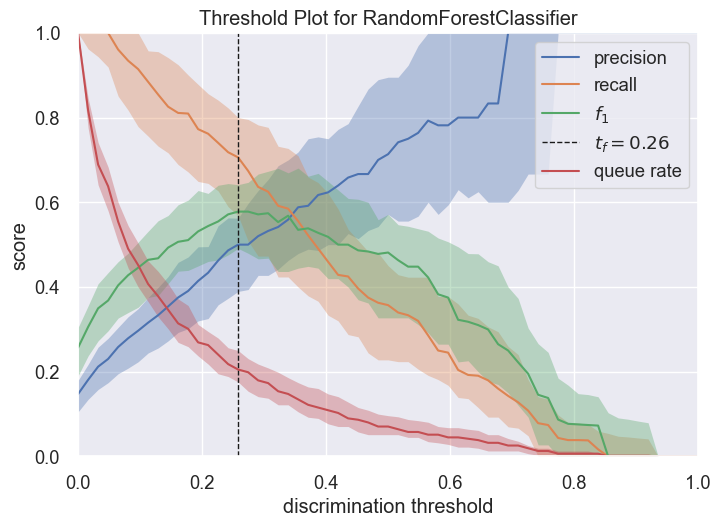

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [256]:
visualizer = DiscriminationThreshold(rfc)

visualizer.fit(x_train_classification, y_train_classification)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

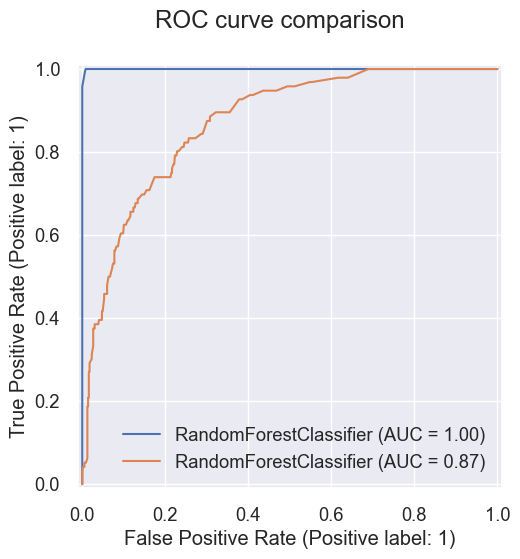

In [257]:
tr_disp = RocCurveDisplay.from_estimator(rfc, x_train_classification, y_train_classification)
ts_disp = RocCurveDisplay.from_estimator(rfc, x_test_classification, y_test_classification, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## Regresión
Variable target: Income

### Regresión Lineal

In [258]:
x_data_reg = data.drop('Income', axis=1)
y_data_reg = data['Income']

x_data_reg = x_data_reg.values
y_data_reg = y_data_reg.values

In [259]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_data_reg, y_data_reg, test_size=0.3, random_state=42)

In [260]:
model_reg = LinearRegression()
model_reg.fit(x_train_reg, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [261]:
pred_tr_reg = model_reg.predict(x_train)
pred_ts_reg = model_reg.predict(x_test)

In [262]:

with open('lr.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Random Forest Regressor

In [263]:
model_rfr = RandomForestRegressor()

In [264]:
params = {
    # 'n_estimators' : [10, 100, 300, 500,1000],
    'n_estimators' : [10],
    'max_features': [50,100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rfr = GridSearchCV(estimator = model_rfr,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5, 
                        verbose = 1
                        )

In [265]:
grid_rfr.fit(x_train_reg, y_train_reg)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [50, 100], 'n_estimators': [10]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [266]:
grid_rfr.best_estimator_

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [267]:
grid_rfr.predict(x_train_reg)
grid_rfr.predict(x_test_reg)

array([ 56357.8,  28231.1,  34974.9,  70302.9,  19424.4,  82102.6,
        79891.5,  63901.2,  52676.1,  82317.1,  55130.4,  27712.7,
        48457.3,  55055.9,  33490.2,  76026. ,  37003.8,  78146.2,
        39829.6,  82923.7,  50440. ,  58295.9,  26506.6,  36115.4,
        58477.5,  67077.1,  65066.3,  21033.4,  86017.7,  79772.9,
        29518.4,  74477.4,  30567.3,  37099.6,  21228.3,  50038.5,
        86325.4,  49005.7,  70855. ,  70665.6,  78972.1,  44153.9,
        84466.7,  49852.9,  58665.3,  53392.2,  49255.3,  27144.7,
        51528.1,  23787.6,  68128.9,  49419.6,  21888.5,  64779.1,
        64890.2,  75277.3,  71438.1,  65174.9,  35719.2,  36658.9,
        72374.3,  17759.1,  35762.2,  33889.8,  82974.2,  57487.8,
        57316.8,  75142.9,  67777.6,  47497.8,  86442.5,  57310.5,
        18302.5,  32998.4,  45431.9,  45560.4,  56499.9,  80627.2,
        12277.5,  62242.7,  82274.2,  73934. , 133414. ,  70513.1,
        57828.7,  26524.9,  58631. ,  36236. ,  58596.2,  2725

In [268]:
grid_rfr.best_params_

{'max_features': 100, 'n_estimators': 10}

In [269]:
X = data.drop('Income', axis=1)
y = data['Income']

In [270]:
X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
grid_rfr.fit(X_train_rfr, y_train_rfr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [50, 100], 'n_estimators': [10]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [272]:
grid_rfr.best_estimator_

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [273]:
grid_rfr.predict(X_train_rfr)
grid_rfr.predict(X_test_rfr)

array([ 58971.9,  28039.7,  31273.2,  69253.6,  13840.4,  83347.8,
        80355.7,  63534.4,  51942.6,  81910.6,  59756. ,  35049.1,
        54556.9,  56454.2,  31580.5,  75376.5,  35296.8,  73386.6,
        38934.2,  86641.6,  50887.9,  62486.8,  29006.7,  32895.5,
        59544.4,  71906. ,  63150.2,  24770.4,  84504.3,  79038.7,
        28644.8,  74390.9,  35302. ,  37577.3,  24748.5,  48322.6,
        91612. ,  50619.2,  76973.6,  70896. ,  78375.1,  40315.7,
        81252.6,  49444.5,  52497.4,  53381.7,  44410.9,  31772.5,
        53666.3,  20839.8,  68828.3,  48865.1,  24001.9,  67233.9,
        63750.6,  73896.7,  75099.7,  64612.4,  39473. ,  35908.1,
        71017.8,  17107.8,  30623.9,  34046. ,  85338.6,  58665.8,
        57048.8,  73921.5,  70683.1,  45801.6,  79494. ,  54997.1,
        19762.4,  34867.1,  41221.7,  46748.6,  58409.7,  79829.7,
        14307.3,  61348.9,  76112.9,  73093.8,  64692.6,  66318.1,
        58634.1,  29091.4,  58408.5,  36213. ,  58610.6,  3147

In [274]:
grid_rfr.best_params_

{'max_features': 50, 'n_estimators': 10}

#### Combinatoria de parámetros

In [275]:
pd.concat([pd.DataFrame(grid_rfr.cv_results_["params"]),
           pd.DataFrame(grid_rfr.cv_results_["mean_test_score"], 
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
0,50,10,-6756.384770
1,100,10,-6788.273615


In [276]:
grid_rfr.score(X_train_rfr, y_train_rfr)

-2602.573645598194

In [277]:
grid_rfr.score(X_test_rfr, y_test_rfr)

-6602.772072072072

In [278]:
# Guardar el modelo
with open('rfr.pickle', 'wb') as handle:
    pickle.dump(grid_rfr.best_estimator_, handle, protocol=pickle.HIGHEST_PROTOCOL)
